In [36]:
import pandas as pd
import models
import importlib
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [37]:
importlib.reload(models)
from models import confusion_matrix
from models import encode
from models import preprocessor
from models.model_knn import KNN
importlib.reload(models.model_knn)

<module 'models.model_knn' from 'd:\\Kuliah Stuff\\Kodingans\\PPM TA\\Kel-PPM-E\\Tugas_Project\\models\\model_knn.py'>

In [38]:
df = pd.read_csv('D:\Kuliah Stuff\Kodingans\PPM TA\Kel-PPM-E\Dataset\dropped_chirosis.csv', sep=';')

In [39]:
class_col = df['Stage']
x = df.drop(['ID', 'Stage'],axis = 1 )
x.head()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


Banyak pengidap chirrosis non-akut:  182
Banyak pengidap chirrosis akut :  94


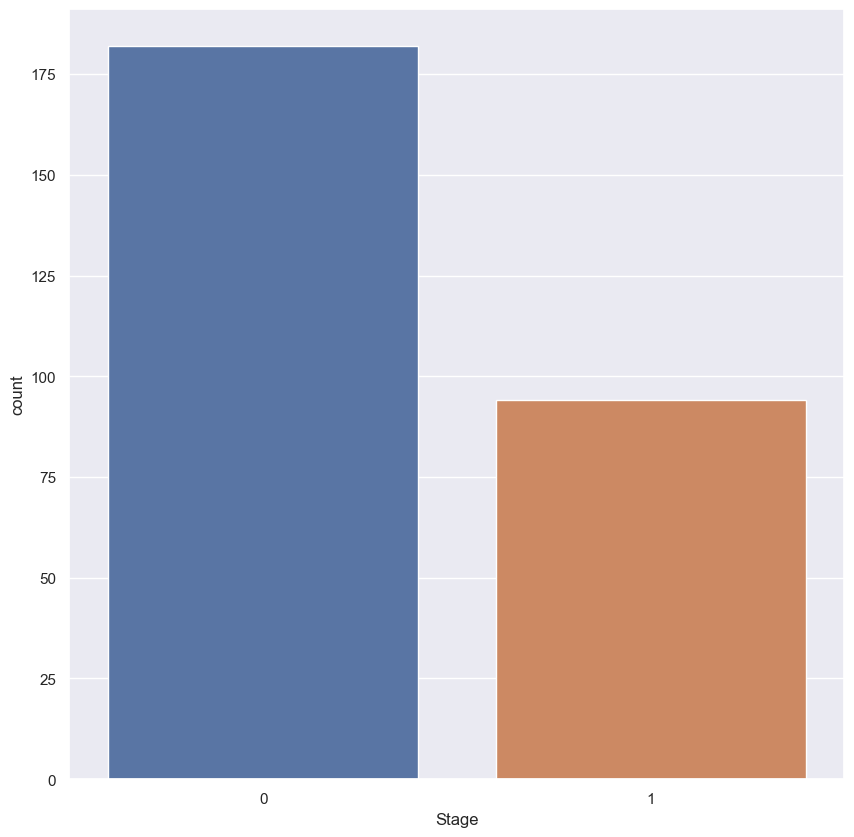

In [40]:
ax = sns.countplot(x = 'Stage', data = df)  
A, B = class_col.value_counts()
print('Banyak pengidap chirrosis non-akut: ',A)
print('Banyak pengidap chirrosis akut : ',B)

In [41]:
x.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1979.166667,18189.326087,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507
std,1112.380295,3843.555619,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000
25%,1185.750000,15162.500000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000
50%,1788.000000,18156.500000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000
75%,2689.750000,20667.500000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000
max,4556.000000,28650.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


In [42]:
df.isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

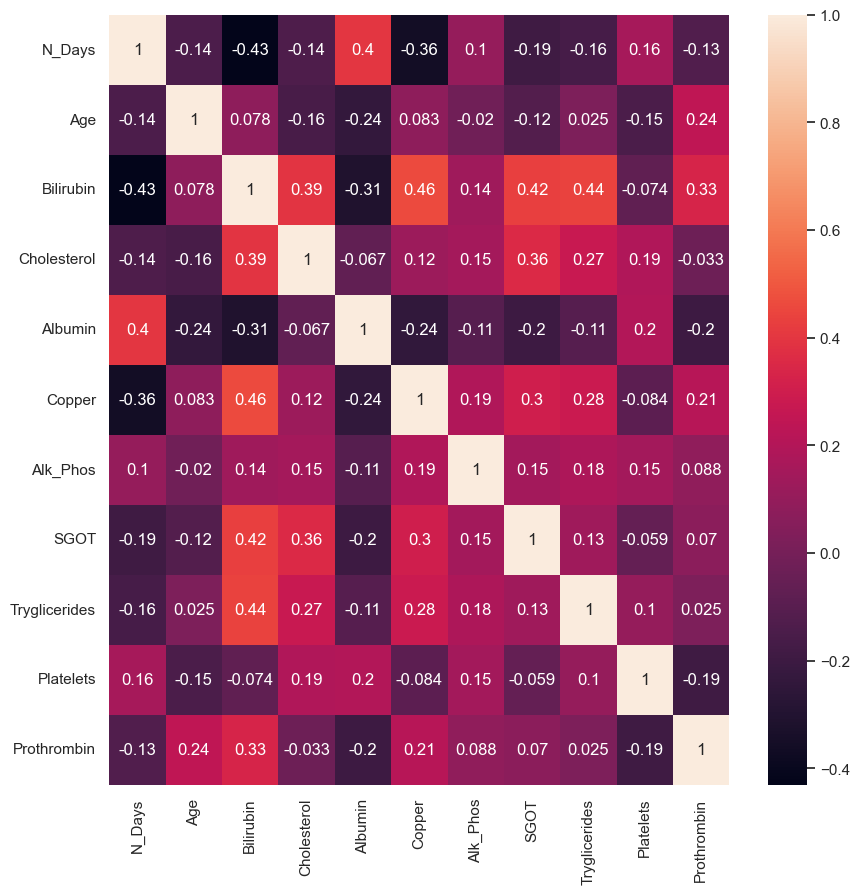

In [43]:

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x.corr(), annot=True)
plt.show()

In [44]:
normalized = preprocessor.zscore(df)

In [45]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(normalized, test_size = 0.2, random_state=42)
model_knn = KNN(5)
confusion_matrix.report_knn(data_latih, data_uji,model_knn)

              precision    recall  f1-score   support

           0       0.66      0.81      0.73        36
           1       0.42      0.25      0.31        20

    accuracy                           0.61        56
   macro avg       0.54      0.53      0.52        56
weighted avg       0.57      0.61      0.58        56

